<a href="https://colab.research.google.com/github/jan-kreischer/EPFL_OPT4ML/blob/main/src/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/xavoliva6/oml_project/blob/main/src/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Federated Machine Learning with Differential Privacy

**Clone Repo**<br/>
Run the following cells in Google Colab in order to clone the code from Github to your Google Drive or pull the latest changes.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [ ]:
# Run this cell if you did not clone the repo yet
! git clone https://github.com/jan-kreischer/EPFL_OPT4ML.git OPT4ML

fatal: destination path 'OPT4ML' already exists and is not an empty directory.


In [ ]:
# Run this cell to pull the latest changes
%cd /content/gdrive/My Drive/OPT4ML
! git config --global user.email "student@epfl.ch"
! git config --global user.name "Student"
! git stash
! git pull origin main

/content/gdrive/My Drive/OPT4ML
Saved working directory and index state WIP on main: 66cc624 Added gpu support
From https://github.com/xavoliva6/oml_project
 * branch            main       -> FETCH_HEAD
Already up to date.


**Colab Support**<br/>
Only run the following lines if you want to run the code on Google Colab

In [1]:
# Enable access to files stored in Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/My Drive/OPT4ML/src

/content/gdrive/My Drive/OPT4ML/src


# Main

In [ ]:
# Install necessary requirements
!pip install -r ../requirements.txt

In [4]:
# Make sure cuda support is available
import torch
if torch.cuda.is_available():  
  device_name = "cuda:0" 
else:  
  device_name = "cpu"  
print("device_name: {}".format(device_name))
device = torch.device(device_name)

device_name: cuda:0


In [5]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from utils import *

from model import CNN
from server import Server


In [ ]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")

In [ ]:
# --- TRAINING PARAMETERS ---
# NR_CLIENTS ... Number of clients participating in the training process.
# LR ... Learning rate used for the stochastic gradient descent.
# CLIENT EPOCHS ... Number of epochs that every client is trained during every step.
# NR_TRAINING_ROUNDS ... Number of times that the server performs a global model update.
# IS_PARALLEL ... Is the training of the clients performed in parallel.
# DATA ... Dataset to be used. Either 'MNIST', 'MED' or 'FEMNIST'.
# BATCH_SIZE ... Batch size used by SGD algorithm.

In [ ]:
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
# IS PRIVATE ... 
# MAX_GRAD_NORM
# EPSILON
# EPISILON_TRAINING_ITERATION
# VIRTUAL_BATCH_SIZE
# N_ACCUMULATION_STEPS

## 1. Experiments on Medical Dataset
In the first experiment we are comparing the accuracy of a fed ml approach including privacy 

In [ ]:
data = "Med"
batch_size = 10

### Experiment 1.1

In [ ]:
# --- TRAINING PARAMETERS ---
nr_clients = 3
lr = 0.01
client_epochs = 10 
nr_training_rounds = 20
is_parallel = False
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
is_private = False
max_grad_norm = 1.2
epsilon = 5
epsilon_training_iteration = epsilon / nr_training_rounds
virtual_batch_size = 2 * batch_size
assert virtual_batch_size % batch_size == 0  # VIRTUAL_BATCH_SIZE should be divisible by BATCH_SIZE
n_accumulation_steps = int(virtual_batch_size / batch_size)

In [ ]:
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, verbose="server")
test_losses, test_accs = server(early=True, patience=3, delta=0.05)

--- Configuration ---
nr_clients: 3
nr_training_rounds: 20
lr: 0.01
epochs: 10
data: Med
batch_size: 10
max_grad_norm: 1.2
epsilon: 5
n_accumulation_steps: 2
epsilon_training_iteration: 0.25
is_parallel: False
is_private: False
device: <class 'torch.device'>
verbose: server
Med
False
--- Training ---


TypeError: zeros() received an invalid combination of arguments - got (torch.Size, device=type), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


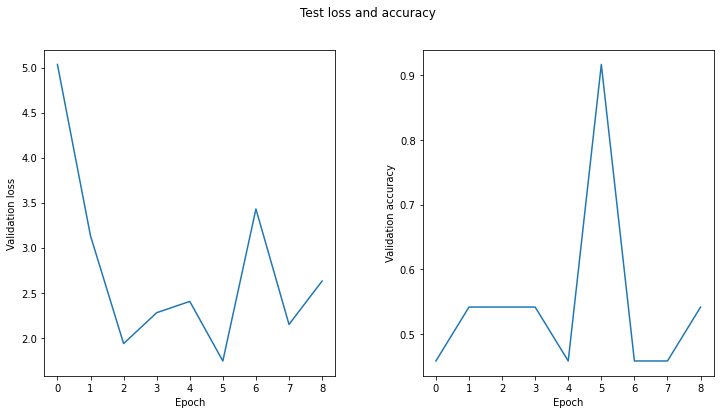

In [ ]:
plot_metrics(test_losses, test_accs)

In [ ]:
is_private=True
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, verbose="server")
test_losses, test_accs = server(early=False, patience=3, delta=0.05)

Round 1, test_loss: 3.5342, test_acc: 0.4166666666666667
Round 2, test_loss: 2.9472, test_acc: 0.4166666666666667
Round 3, test_loss: 3.1924, test_acc: 0.4166666666666667
Round 4, test_loss: 2.9047, test_acc: 0.4166666666666667
Round 5, test_loss: 2.6363, test_acc: 0.4166666666666667
Round 6, test_loss: 2.5028, test_acc: 0.125
Round 7, test_loss: 2.5993, test_acc: 0.16666666666666666
Round 8, test_loss: 3.6917, test_acc: 0.4166666666666667
Round 9, test_loss: 2.6372, test_acc: 0.3333333333333333
Round 10, test_loss: 3.9295, test_acc: 0.4166666666666667
Round 11, test_loss: 3.7825, test_acc: 0.4166666666666667
Round 12, test_loss: 2.9147, test_acc: 0.4166666666666667
Round 13, test_loss: 4.1432, test_acc: 0.4166666666666667
Round 14, test_loss: 3.9848, test_acc: 0.4166666666666667
Round 15, test_loss: 5.3252, test_acc: 0.4166666666666667
Round 16, test_loss: 5.9021, test_acc: 0.4166666666666667
Round 17, test_loss: 8.5031, test_acc: 0.4166666666666667
Round 18, test_loss: 8.6358, test_a

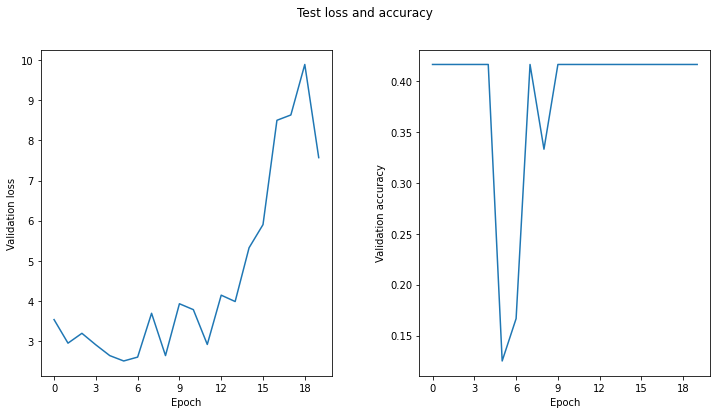

In [ ]:
plot_metrics(test_losses, test_accs)

## 2. Experiments on MNIST Dataset

In [ ]:
data = 'MNIST'
batch_size = 128

In [9]:
# --- TRAINING PARAMETERS ---
nr_clients = 3
lr = 0.01
client_epochs = 10 
nr_training_rounds = 20
is_parallel = True

In [ ]:
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
is_private = True
max_grad_norm = 1.2
epsilon = 5
epsilon_training_iteration = epsilon / nr_training_rounds
virtual_batch_size = 2 * batch_size
assert virtual_batch_size % batch_size == 0  # VIRTUAL_BATCH_SIZE should be divisible by BATCH_SIZE
n_accumulation_steps = int(virtual_batch_size / batch_size)

In [ ]:
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private)
test_losses, test_accs = server(early=True, patience=5, delta=0.05)

--- Configuration ---
nr_clients: 3
nr_training_rounds: 20
lr: 0.01
epochs: 10
data: MNIST
batch_size: 128
max_grad_norm: 1.2
epsilon: 5
n_accumulation_steps: 2
epsilon_training_iteration: 0.25
is_parallel: True
is_private: True
device: <class 'torch.device'>
verbose: all
MNIST
True
Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/Users/jankreischer/opt/anaconda3/envs/EPFL_Optimization-for-Machine-Learning/lib/python3.8/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/Users/jankreischer/opt/anaconda3/envs/EPFL_Optimization-for-Machine-Learning/lib/python3.8/site-packages/opacus/privacy_engine.py:522: UserWarning: A ``sample_rate`` has been provided.Thus, the provided ``batch_size``and ``sample_size`` will be ignored.
  warnings.warn(
/Users/jankreischer/opt/anaconda3/envs/EPFL_Optimization-for-Machine-

[Client 0]	Using sigma=7.223188476562501 and C=1.2
[Client 1]	Using sigma=7.223188476562501 and C=1.2


/Users/jankreischer/opt/anaconda3/envs/EPFL_Optimization-for-Machine-Learning/lib/python3.8/site-packages/opacus/privacy_engine.py:194: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_rng`` turned on.
  warnings.warn(


[Client 2]	Using sigma=7.223188476562501 and C=1.2
--- Training ---


/Users/jankreischer/opt/anaconda3/envs/EPFL_Optimization-for-Machine-Learning/lib/python3.8/site-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


[Client 2]	Train Epoch: 0	Loss: 2.2916
	(ε = 0.18, δ = 2.5e-05) for α = 63.0
[Client 0]	Train Epoch: 0	Loss: 2.3099
	(ε = 0.18, δ = 2.5e-05) for α = 63.0
[Client 1]	Train Epoch: 0	Loss: 2.3144
	(ε = 0.18, δ = 2.5e-05) for α = 63.0
[Client 2]	Train Epoch: 1	Loss: 2.2842
	(ε = 0.19, δ = 2.5e-05) for α = 63.0
[Client 0]	Train Epoch: 1	Loss: 2.2589
	(ε = 0.19, δ = 2.5e-05) for α = 63.0
[Client 1]	Train Epoch: 1	Loss: 2.2713
	(ε = 0.19, δ = 2.5e-05) for α = 63.0


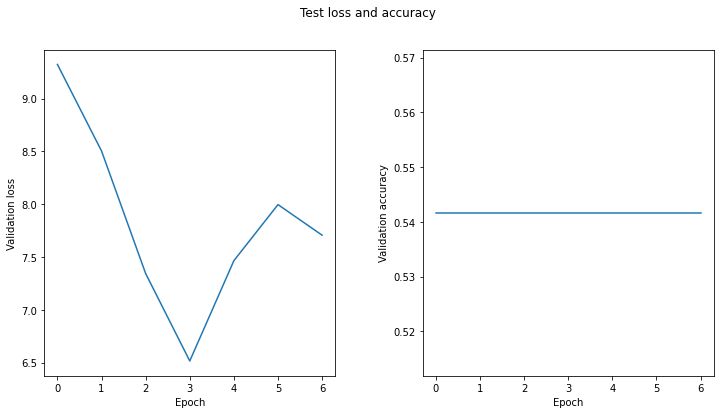

In [ ]:
plot_metrics(test_losses, test_accs)

## 3. Experiments on FEMNIST Dataset

In [ ]:
data = "FEMNIST"
batch_size = 64

In [6]:
# --- TRAINING PARAMETERS ---
nr_clients = 3
lr = 0.01
client_epochs = 10
nr_training_rounds = 20
is_parallel = True

In [7]:
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
is_private = False
max_grad_norm = 1.2
epsilon = 5
epsilon_training_iteration = epsilon / nr_training_rounds
virtual_batch_size = 2 * batch_size
assert virtual_batch_size % batch_size == 0  # VIRTUAL_BATCH_SIZE should be divisible by BATCH_SIZE
n_accumulation_steps = int(virtual_batch_size / batch_size)

In [8]:
torch.cuda.empty_cache()
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, device=device, verbose="all")
test_losses, test_accs = server(early=False, patience=5, delta=0.05)

--- Configuration ---
nr_clients: 3
nr_training_rounds: 20
lr: 0.01
epochs: 10
data: FEMNIST
batch_size: 64
max_grad_norm: 1.2
epsilon: 5
n_accumulation_steps: 2
epsilon_training_iteration: 0.25
is_parallel: True
is_private: False
device: <class 'torch.device'>
verbose: all
FEMNIST
False
--- Load Data ---
Loaded Test Data
Loaded Training Data
--- Training ---
[Client 2]	Train Epoch: 0	Loss: 1.5756
[Client 0]	Train Epoch: 0	Loss: 1.5211
[Client 1]	Train Epoch: 0	Loss: 1.6706
[Client 2]	Train Epoch: 1	Loss: 0.5244
[Client 0]	Train Epoch: 1	Loss: 0.5473
[Client 1]	Train Epoch: 1	Loss: 0.4766
[Client 2]	Train Epoch: 2	Loss: 0.6028
[Client 0]	Train Epoch: 2	Loss: 0.3845
[Client 1]	Train Epoch: 2	Loss: 0.2256
[Client 2]	Train Epoch: 3	Loss: 0.1716
[Client 0]	Train Epoch: 3	Loss: 0.3198
[Client 1]	Train Epoch: 3	Loss: 0.2416
[Client 2]	Train Epoch: 4	Loss: 0.2048
[Client 0]	Train Epoch: 4	Loss: 0.3552
[Client 1]	Train Epoch: 4	Loss: 0.0775
[Client 2]	Train Epoch: 5	Loss: 0.1223
[Client 0]	Tra

KeyboardInterrupt: ignored